<a href="https://colab.research.google.com/github/Chamindabandara/Colab_Data/blob/master/Machine_Perception_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import torch
import torchvision
import torchvision.transforms as transforms

# Downloading, Loading and Normalising CIFAR-10

In [91]:
# This is the two-step process used to prepare the
# data for use with the convolutional neural network.

# First step is to convert Python Image Library (PIL) format
# to PyTorch tensors.

# Second step is used to normalize the data by specifying a 
# mean and standard deviation for each of the three channels.
# This will convert the data from [0,1] to [-1,1]

# Normalization of data should help speed up conversion and
# reduce the chance of vanishing gradients with certain 
# activation functions.
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='/home/CIFAR-10 Classifier Using CNN in PyTorch/data/', 
                                        train=True,
                                        download=True, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False,
                                       download=True, 
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


# Display Random Batch of 4 Training Images

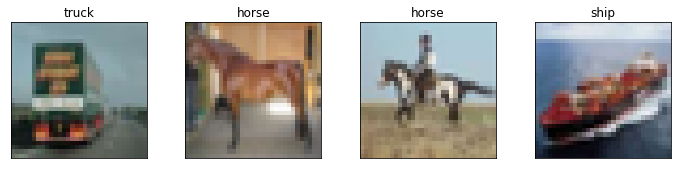

In [92]:
import matplotlib.pyplot as plt
import numpy as np

def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)

dataiter = iter(trainloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

# Defining the Convolutional Neural Network

In [93]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.fc1 = nn.Linear(64 * 5 * 5, 480)
        self.fc2 = nn.Linear(480, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(p=0.5)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x
    
net = Net()

# Defining the Loss Function and Optimizer

In [94]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training the Network

In [95]:
import os

model_directory_path = '/home/CIFAR-10 Classifier Using CNN in PyTorch/model/'
model_path = model_directory_path + 'cifar-10-cnn-model.pt'

if not os.path.exists(model_directory_path):
    os.makedirs(model_directory_path)

if os.path.isfile(model_path):
    # load trained model parameters from disk
    net.load_state_dict(torch.load(model_path))
    print('Loaded model parameters from disk.')
else:
    for epoch in range(50):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training.')
    torch.save(net.state_dict(), model_path)
    print('Saved model parameters to disk.')

[1,  2000] loss: 2.159
[1,  4000] loss: 1.874
[1,  6000] loss: 1.732
[1,  8000] loss: 1.622
[1, 10000] loss: 1.541
[1, 12000] loss: 1.491
[2,  2000] loss: 1.414
[2,  4000] loss: 1.404
[2,  6000] loss: 1.363
[2,  8000] loss: 1.313
[2, 10000] loss: 1.274
[2, 12000] loss: 1.263
[3,  2000] loss: 1.194
[3,  4000] loss: 1.192
[3,  6000] loss: 1.155
[3,  8000] loss: 1.165
[3, 10000] loss: 1.139
[3, 12000] loss: 1.117
[4,  2000] loss: 1.035
[4,  4000] loss: 1.060
[4,  6000] loss: 1.049
[4,  8000] loss: 1.011
[4, 10000] loss: 1.038
[4, 12000] loss: 1.015
[5,  2000] loss: 0.939
[5,  4000] loss: 0.955
[5,  6000] loss: 0.950
[5,  8000] loss: 0.932
[5, 10000] loss: 0.959
[5, 12000] loss: 0.952
[6,  2000] loss: 0.849
[6,  4000] loss: 0.870
[6,  6000] loss: 0.872
[6,  8000] loss: 0.875
[6, 10000] loss: 0.889
[6, 12000] loss: 0.922
[7,  2000] loss: 0.799
[7,  4000] loss: 0.800
[7,  6000] loss: 0.836
[7,  8000] loss: 0.850
[7, 10000] loss: 0.832
[7, 12000] loss: 0.836
[8,  2000] loss: 0.751
[8,  4000] 

# Testing the Network

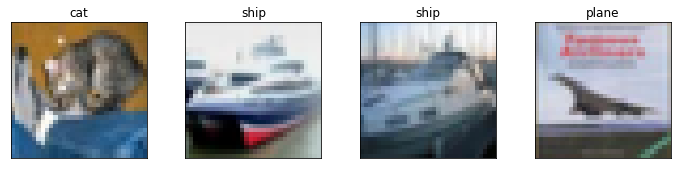

In [96]:
dataiter = iter(testloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [97]:
outputs = net(images)
outputs
sm = nn.Softmax(dim=1)
sm_outputs = sm(outputs)
print(sm_outputs)

tensor([[9.6404e-09, 1.6926e-07, 3.0643e-05, 2.6768e-01, 1.0665e-05, 1.2809e-03,
         7.3090e-01, 1.3082e-05, 2.5932e-07, 8.6653e-05],
        [2.5210e-17, 4.1885e-24, 4.7837e-29, 4.3904e-23, 1.5902e-24, 8.4976e-32,
         1.5100e-30, 8.1491e-26, 1.0000e+00, 1.6525e-21],
        [2.5989e-02, 6.6555e-03, 8.4844e-03, 1.0822e-01, 3.6509e-02, 5.3259e-02,
         4.1251e-02, 5.9772e-03, 7.0730e-01, 6.3578e-03],
        [9.9999e-01, 4.5973e-09, 5.5815e-06, 1.4060e-11, 4.3220e-06, 2.1882e-12,
         9.0302e-08, 4.4948e-09, 1.7631e-08, 9.0896e-10]],
       grad_fn=<SoftmaxBackward>)


# Predicted Category for Four Test Images

In [98]:
probs, index = torch.max(sm_outputs, dim=1)

for p, i in zip(probs, index):
    print('{0} - {1:.4f}'.format(classes[i], p))

frog - 0.7309
ship - 1.0000
ship - 0.7073
plane - 1.0000


# Predicting the Category for all Test Images

In [99]:
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))

Model accuracy on 10000 test images: 68.39%


In [100]:
print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_matrix):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))

Category   - Accuracy
plane      - 76.3
car        - 77.6
bird       - 59.9
cat        - 52.1
deer       - 60.9
dog        - 57.3
frog       - 73.6
horse      - 66.9
ship       - 85.1
truck      - 74.2


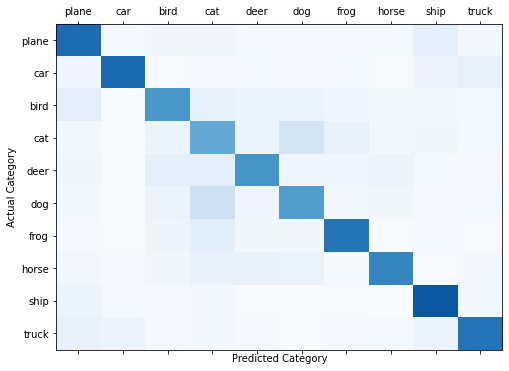

In [101]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()


In [102]:
print('actual/pred'.ljust(16), end='')
for i,c in enumerate(classes):
    print(c.ljust(10), end='')
print()
for i,r in enumerate(confusion_matrix):
    print(classes[i].ljust(16), end='')
    for idx, p in enumerate(r):
        print(str(p).ljust(10), end='')
    print()
    
    r = r/np.sum(r)
    print(''.ljust(16), end='')
    for idx, p in enumerate(r):
        print(str(p).ljust(10), end='')
    print()

actual/pred     plane     car       bird      cat       deer      dog       frog      horse     ship      truck     
plane           763       13        35        33        14        8         8         12        88        26        
                0.763     0.013     0.035     0.033     0.014     0.008     0.008     0.012     0.088     0.026     
car             40        776       4         10        12        8         14        5         50        81        
                0.04      0.776     0.004     0.01      0.012     0.008     0.014     0.005     0.05      0.081     
bird            97        4         599       77        63        70        40        19        19        12        
                0.097     0.004     0.599     0.077     0.063     0.07      0.04      0.019     0.019     0.012     
cat             29        5         62        521       53        178       74        31        33        14        
                0.029     0.005     0.062     0.521     0.053   